In [1]:
import sklearn
print(sklearn.__version__) # This version of sklearn is recommended for unpickling the saved models

0.24.2


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
prob_matrix = np.load("../Probability_Matrices/Six_element_matrix.npy") # Probability_Matrices.zip needs to be extracted in HEA_New_Folder directory to proceed, this directory is too big to upload via git commands without lfs
prob_matrix.shape

(64260, 6)

In [27]:
df = pd.DataFrame(prob_matrix, columns = ['Al','Co', 'Cr', 'Cu', 'Fe', 'Ni']) # The columns must be the elements the user wants to experiment on
df

,Al,Co,Cr,Cu,Fe,Ni
0,0.01,0.02,0.03,0.04,0.05,0.85
1,0.01,0.02,0.03,0.04,0.06,0.84
2,0.01,0.02,0.03,0.04,0.07,0.83
3,0.01,0.02,0.03,0.04,0.08,0.82
4,0.01,0.02,0.03,0.04,0.09,0.81
...,...,...,...,...,...,...
64255,0.13,0.14,0.15,0.17,0.20,0.21
64256,0.13,0.14,0.15,0.18,0.19,0.21
64257,0.13,0.14,0.16,0.17,0.19,0.21
64258,0.13,0.14,0.16,0.18,0.19,0.20


In [28]:
a = ['Al', 'Ca', 'Cu', 'Zr', 'Ni', 'Nb', 'Ag', 'Mg','Gd', 'Au', 'Si', 'Zn', 'Ce', 'Hf', 'Ti', 'Ga', 'Dy', 'Co', 'Er', 'Fe','Ho', 'La', 'Lu', 'Nd', 'Pr', 'Tb', 'Ta', 'Pd', 'Sm', 'Tm', 'Be', 'Mo','Li', 'In', 'Mn', 'Sn', 'Sc', 'Yb', 'Cr', 'Pb', 'Ge', 'Pt','As', 'B', 'Ba', 'Bi', 'Br', 'C', 'Cd', 'Cl', 'Cs', 'Eu','F', 'H', 'Hg', 'I', 'Ir', 'K', 'N', 'Na', 'Ne', 'Ns', 'O', 'Os', 'P','Rb', 'Re', 'Rh', 'Ru', 'S', 'Sb', 'Se', 'Sr', 'Te', 'Tl', 'V', 'W','Y', 'Tc']
len(a) # All the elements

79

In [29]:
features = ['Ca', 'Zr', 'Nb', 'Ag', 'Mg','Gd', 'Au', 'Si', 'Zn', 'Ce', 'Hf', 'Ti', 'Ga', 'Dy', 'Er', 'Ho', 'La', 'Lu', 'Nd', 'Pr', 'Tb', 'Ta', 'Pd', 'Sm', 'Tm', 'Be', 'Mo','Li', 'In', 'Mn', 'Sn', 'Sc', 'Yb', 'Pb', 'Ge', 'Pt','As', 'B', 'Ba', 'Bi', 'Br', 'C', 'Cd', 'Cl', 'Cs', 'Eu','F', 'H', 'Hg', 'I', 'Ir', 'K', 'N', 'Na', 'Ne', 'Ns', 'O', 'Os', 'P','Rb', 'Re', 'Rh', 'Ru', 'S', 'Sb', 'Se', 'Sr', 'Te', 'Tl', 'V', 'W','Y', 'Tc']
# features have 73 elements[Total(79elements)- input(6 elements) = 73 elements which are padded with zeros in dataset]
for ele in features:
    df[ele] = 0
reorder = ['Al', 'Ca', 'Cu', 'Zr', 'Ni', 'Nb', 'Ag', 'Mg','Gd', 'Au', 'Si', 'Zn', 'Ce', 'Hf', 'Ti', 'Ga', 'Dy', 'Co', 'Er', 'Fe','Ho', 'La', 'Lu', 'Nd', 'Pr', 'Tb', 'Ta', 'Pd', 'Sm', 'Tm', 'Be', 'Mo','Li', 'In', 'Mn', 'Sn', 'Sc', 'Yb', 'Cr', 'Pb', 'Ge', 'Pt','As', 'B', 'Ba', 'Bi', 'Br', 'C', 'Cd', 'Cl', 'Cs', 'Eu','F', 'H', 'Hg', 'I', 'Ir', 'K', 'N', 'Na', 'Ne', 'Ns', 'O', 'Os', 'P','Rb', 'Re', 'Rh', 'Ru', 'S', 'Sb', 'Se', 'Sr', 'Te', 'Tl', 'V', 'W','Y', 'Tc']
df = df[reorder]
df

,Al,Ca,Cu,Zr,Ni,Nb,Ag,Mg,Gd,Au,...,S,Sb,Se,Sr,Te,Tl,V,W,Y,Tc
0,0.01,0,0.04,0,0.85,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.01,0,0.04,0,0.84,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.01,0,0.04,0,0.83,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.01,0,0.04,0,0.82,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.01,0,0.04,0,0.81,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64255,0.13,0,0.17,0,0.21,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64256,0.13,0,0.18,0,0.21,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64257,0.13,0,0.17,0,0.21,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64258,0.13,0,0.18,0,0.20,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
import pickle
filename1 = "../Saved Models/Classifier Models/random_state_0/classifier_gradientBoosting.sav"
filename2 = "../Saved Models/Regressor Models/random_state_0/XGBoost_regressor.sav"
classifier = pickle.load(open(filename1, 'rb'))
regressor = pickle.load(open(filename2, 'rb'))

In [31]:
classifier_preds = (classifier.predict(df))

count = (classifier_preds == 1).sum() # All the alloys are predicted HEAs(represented by 1)
print(len(classifier_preds), count) #64260 is the total number of alloys possible and 44929 of them are HEAs

64260 55592


32 HEA alloy samples are used to validate the classifier. When experimentalists explore for new HEAs, this test.csv is to be replaced by the df dataframe computed from the corresponding Probability Matrix

In [32]:
test = pd.read_csv("../Datasets/test_32.csv") # This is a testset of 32 6-element alloys for validating against HEA classifier and predicting their bulk moduli values 
features = ['Ca', 'Zr', 'Nb', 'Ag', 'Mg','Gd', 'Au', 'Si', 'Zn', 'Ce', 'Hf', 'Ti', 'Ga', 'Dy', 'Er', 'Ho', 'La', 'Lu', 'Nd', 'Pr', 'Tb', 'Ta', 'Pd', 'Sm', 'Tm', 'Be', 'Mo','Li', 'In', 'Mn', 'Sn', 'Sc', 'Yb', 'Pb', 'Ge', 'Pt','As', 'B', 'Ba', 'Bi', 'Br', 'C', 'Cd', 'Cl', 'Cs', 'Eu','F', 'H', 'Hg', 'I', 'Ir', 'K', 'N', 'Na', 'Ne', 'Ns', 'O', 'Os', 'P','Rb', 'Re', 'Rh', 'Ru', 'S', 'Sb', 'Se', 'Sr', 'Te', 'Tl', 'V', 'W','Y', 'Tc']
# features have 73 elements[Total(79elements)- input(6 elements) = 73 elements which are padded with zeros in dataset]
for ele in features:
    test[ele] = 0
reorder = ['Al', 'Ca', 'Cu', 'Zr', 'Ni', 'Nb', 'Ag', 'Mg','Gd', 'Au', 'Si', 'Zn', 'Ce', 'Hf', 'Ti', 'Ga', 'Dy', 'Co', 'Er', 'Fe','Ho', 'La', 'Lu', 'Nd', 'Pr', 'Tb', 'Ta', 'Pd', 'Sm', 'Tm', 'Be', 'Mo','Li', 'In', 'Mn', 'Sn', 'Sc', 'Yb', 'Cr', 'Pb', 'Ge', 'Pt','As', 'B', 'Ba', 'Bi', 'Br', 'C', 'Cd', 'Cl', 'Cs', 'Eu','F', 'H', 'Hg', 'I', 'Ir', 'K', 'N', 'Na', 'Ne', 'Ns', 'O', 'Os', 'P','Rb', 'Re', 'Rh', 'Ru', 'S', 'Sb', 'Se', 'Sr', 'Te', 'Tl', 'V', 'W','Y', 'Tc']
test = test[reorder]
test

,Al,Ca,Cu,Zr,Ni,Nb,Ag,Mg,Gd,Au,...,S,Sb,Se,Sr,Te,Tl,V,W,Y,Tc
0,1.00,0,1.00,0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.00,0,0.50,0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.80,0,1.00,0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.00,0,1.00,0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.00,0,0.50,0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1.30,0,1.00,0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1.50,0,1.00,0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1.80,0,1.00,0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2.30,0,1.00,0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2.50,0,1.00,0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
classifier_preds = (classifier.predict(test))
print(len(classifier_preds))# There are 32 alloys in validation set
classifier_preds# All the alloys are predicted HEAs(represented by 1)

32


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

Here all 32 alloys were predicted HEAs. For custom data incase of occurance of non HEAs(represented by 0s), please remove those rows from the dataframe df before proceeding ( np.where(classifier_preds == 0)[0] or np.argwhere(classifier_preds == 0) is used to get a list of indices with 0s from classifier predictions)

In [34]:
test['S_Phase_AM'] =0
test['S_Phase_AM+IM'] =0
test['S_Phase_IM'] =0
test['S_Phase_IM+SS'] =0
test['S_Phase_SS'] =1 # Since all the alloys are SS, it is made 1 and others are 0. Experimentalists are to choose one of the expected output phase and make that 1 in the one hot encoding
test['S_Phase_SS+IM'] =0
reorder = ['S_Phase_AM', 'S_Phase_AM+IM', 'S_Phase_IM', 'S_Phase_IM+SS','S_Phase_SS', 'S_Phase_SS+IM', 'Ag', 'Al', 'As','Au', 'B', 'Ba', 'Be', 'Bi', 'Br', 'C', 'Ca', 'Cd', 'Ce', 'Cl', 'Co','Cr', 'Cs', 'Cu', 'Dy', 'Er', 'Eu', 'F', 'Fe', 'Ga', 'Gd', 'Ge', 'H','Hf', 'Hg', 'Ho', 'I', 'In', 'Ir', 'K', 'La', 'Li', 'Lu', 'Mg', 'Mn','Mo', 'N', 'Na', 'Nb', 'Nd', 'Ne', 'Ni', 'Ns', 'O', 'Os', 'P', 'Pb','Pd', 'Pr', 'Pt', 'Rb', 'Re', 'Rh', 'Ru', 'S', 'Sb', 'Sc', 'Se', 'Si','Sm', 'Sn', 'Sr', 'Ta', 'Tb', 'Te', 'Ti', 'Tl', 'Tm', 'V', 'W', 'Y','Yb', 'Zn', 'Zr']
test = test[reorder]
test.head()

,S_Phase_AM,S_Phase_AM+IM,S_Phase_IM,S_Phase_IM+SS,S_Phase_SS,S_Phase_SS+IM,Ag,Al,As,Au,...,Te,Ti,Tl,Tm,V,W,Y,Yb,Zn,Zr
0,0,0,0,0,1,0,0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,2.8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,3.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
regressor_preds = (regressor.predict(test))
print("All 32 test bulk moduli values:", regressor_preds, len(regressor_preds))


sorted_indices = np.argsort(regressor_preds)
best_10_indices = sorted_indices[-10:] # Top 10 bulk moduli values are displayed, user can change this number to get the top n values
best_10_BM = regressor_preds[best_10_indices]
print("Best 10 Bulk Modulus Values:",best_10_BM)

All 32 test bulk moduli values: [138.55551 138.09995 140.22255 140.22255 139.46982 140.07841 139.97171
 139.92538 140.22255 140.22255 139.92538 139.51614 142.4985  141.25429
 142.4985  142.4985  142.95407 142.4985  141.72462 142.4985  142.4985
 142.92912 142.4985  141.99509 143.39816 141.25429 143.03148 142.89941
 143.48708 142.4367  142.44382 143.37321] 32
Best 10 Bulk Modulus Values: [142.4985  142.4985  142.4985  142.89941 142.92912 142.95407 143.03148
 143.37321 143.39816 143.48708]


In [36]:
test.iloc[best_10_indices] # Corresponding elemental compositions can be obtained as shown

,S_Phase_AM,S_Phase_AM+IM,S_Phase_IM,S_Phase_IM+SS,S_Phase_SS,S_Phase_SS+IM,Ag,Al,As,Au,...,Te,Ti,Tl,Tm,V,W,Y,Yb,Zn,Zr
14,0,0,0,0,1,0,0,1.00,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,1,0,0,1.00,0,0,...,0,0,0,0,0,0,0,0,0,0
19,0,0,0,0,1,0,0,1.00,0,0,...,0,0,0,0,0,0,0,0,0,0
27,0,0,0,0,1,0,0,0.50,0,0,...,0,0,0,0,0,0,0,0,0,0
21,0,0,0,0,1,0,0,0.80,0,0,...,0,0,0,0,0,0,0,0,0,0
16,0,0,0,0,1,0,0,1.00,0,0,...,0,0,0,0,0,0,0,0,0,0
26,0,0,0,0,1,0,0,0.25,0,0,...,0,0,0,0,0,0,0,0,0,0
31,0,0,0,0,1,0,0,0.75,0,0,...,0,0,0,0,0,0,0,0,0,0
24,0,0,0,0,1,0,0,1.00,0,0,...,0,0,0,0,0,0,0,0,0,0
28,0,0,0,0,1,0,0,0.30,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
test.iloc[best_10_indices].to_csv("../Datasets/Compositions for 10 best Bulk Modulus Values.csv")

We don't have the actual Bulk Modulus values of all these 32 alloys and we only know that these are all HEAs. So we are plotting a parity plot for only those alloys that have experimental values (This is available in test.csv which is a manually compiled csv file from the results obtained from above cells)

In [3]:
test = pd.read_csv("../Datasets/test.csv")
test

,S.No.,Alloy,Phase,Al,Co,Cr,Cu,Fe,Ni,Prediction,Actual,Predicted BM,Actual BM,% Error,Unnamed: 14,Unnamed: 15
0,1.0,AlCoCrCu0.5Fe0.5Ni,SS,1.00,1.0,1.0,0.50,0.5,1.0,1.0,HEA,138.10,NaN,NaN,NaN,NaN
1,2.0,AlCoCrCuFe0.5Ni,SS,1.00,1.0,1.0,1.00,0.5,1.0,1.0,HEA,138.56,149.00,7.01,NaN,NaN
2,3.0,Al2CoCrCu0.5FeNi,SS,2.00,1.0,1.0,0.50,1.0,1.0,1.0,HEA,139.47,152.00,8.24,NaN,NaN
3,4.0,Al1.5CoCrCu0.5FeNi,SS,1.50,1.0,1.0,0.50,1.0,1.0,1.0,HEA,139.52,145.66,4.22,NaN,NaN
4,5.0,Al1.8CoCrCuFeNi,SS,1.80,1.0,1.0,1.00,1.0,1.0,1.0,HEA,139.93,142.00,1.46,NaN,NaN
5,6.0,Al2CoCrCuFeNi,SS,2.00,1.0,1.0,1.00,1.0,1.0,1.0,HEA,139.93,140.00,0.05,NaN,NaN
6,7.0,Al1.5CoCrCuFeNi,SS,1.50,1.0,1.0,1.00,1.0,1.0,1.0,HEA,139.97,145.00,3.47,NaN,NaN
7,8.0,Al1.3CoCrCuFeNi,SS,1.30,1.0,1.0,1.00,1.0,1.0,1.0,HEA,140.08,147.40,4.97,NaN,NaN
8,9.0,Al2.8CoCrCuFeNi,SS,2.80,1.0,1.0,1.00,1.0,1.0,1.0,HEA,140.22,134.00,4.64,NaN,NaN
9,10.0,Al3CoCrCuFeNi,SS,3.00,1.0,1.0,1.00,1.0,1.0,1.0,HEA,140.22,132.00,6.23,NaN,NaN


In [4]:
test.columns

Index(['S.No.', 'Alloy', 'Phase', 'Al', 'Co', 'Cr', 'Cu', 'Fe', 'Ni',
       'Prediction', 'Actual', 'Predicted BM', 'Actual BM', '% Error',
       'Unnamed: 14', 'Unnamed: 15'],
      dtype='object')

In [12]:
compare_df = test[['Predicted BM','Actual BM']].dropna()
print(len(compare_df))
print(min(compare_df['Actual BM']), max(compare_df['Actual BM']))
compare_df

24
132.0 163.0


,Predicted BM,Actual BM
1,138.56,149.00
2,139.47,152.00
3,139.52,145.66
4,139.93,142.00
5,139.93,140.00
6,139.97,145.00
7,140.08,147.40
8,140.22,134.00
9,140.22,132.00
10,140.22,138.00


No handles with labels found to put in legend.


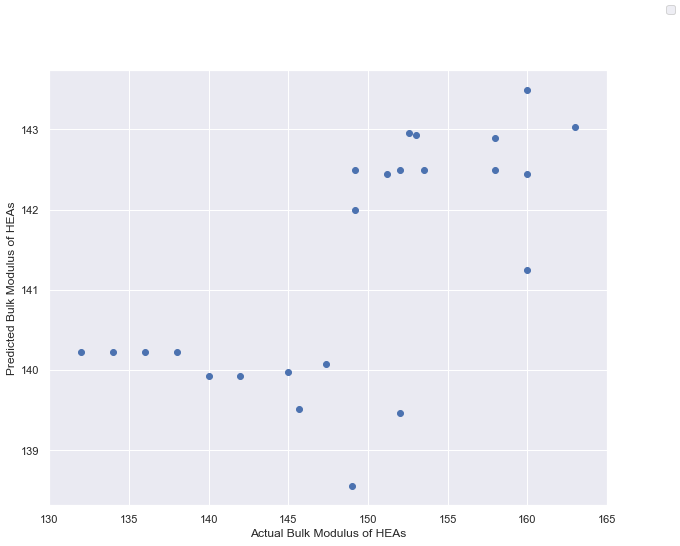

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_theme(color_codes=True)
fig = plt.figure(figsize=(10,8))
ax=fig.add_subplot(111)
ax.set_xlim(130, 165) # The x axis is limited to this range based on the actual bulk modulus values minimum and maximum
# slope, intercept, r_value, p_value, std_err = stats.linregress(compare_df['Actual BM'],compare_df['Predicted BM'])
# sns.regplot(x = 'Actual BM',y = 'Predicted BM',data = compare_df,label='Data points') #line_kws={'label':"Best Linear Fit : " + "y={0:.1f}x+{1:.1f}".format(slope,intercept)},
plt.scatter(compare_df['Actual BM'],compare_df['Predicted BM'])
plt.xlabel('Actual Bulk Modulus of HEAs')
plt.ylabel('Predicted Bulk Modulus of HEAs')
plt.show()